# Posição (ou separatrizes)

## Autores

- [Italo Seara](https://github.com/italoseara)
- [Lucas Luige](https://github.com/lluigecm)
- [Gabriel Prado](https://github.com/Gabriel-Prd)

## Objetivo

Apresentar o conceito de separatrizes e suas aplicações.

## Bibliotecas utilizadas

- [Numpy](https://numpy.org/) para cálculos numéricos
- [Matplotlib](https://matplotlib.org/) para visualização de dados
- [Pandas](https://pandas.pydata.org/) para manipulação de dados

In [792]:
# Carregando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementações próprias

As implementações abaixo serão utilizadas ao longo do notebook para facilitar a visualização dos dados, transformando os dados que seriam retornados em forma de arrays em dataframes que podem ser visualizados como uma tabela. Note que não é necessário utiliza-las para fins de cálculo, apenas para visualização.

A classe `FrequencyTable` foi criada para que haja de forma similar à `fdt` da biblioteca `fdth` em R. Ela utiliza a função [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) do pandas para criar os intervalos de classe.

A função `quantile` calcula os quantis de uma amostra utilizando a função [`np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) do numpy.

In [793]:
class FrequencyTable(pd.DataFrame):
    def __init__(self, f: np.array, start: float, end: float, right: bool = False) -> None:
        # Criando os intervalos
        bins = np.linspace(start, end, len(f)+1)

        # Criando a tabela de frequência
        super().__init__({'f': f}, index=pd.cut(bins[:-1], bins, right=right))

        total         = self['f'].sum()
        self['rf']    = self['f'] / total         # Frequência relativa
        self['rf(%)'] = self['rf'] * 100          # Frequência relativa percentual
        self['cf']    = self['f'].cumsum()        # Frequência acumulada
        self['cf(%)'] = self['cf'] / total * 100  # Frequência acumulada percentual

    def quantile(self, q: float | list[float] | np.ndarray) -> float | list[float]:
        if type(q) in [list, np.ndarray]:
            return [self.quantile(i) for i in q]

        if not 0 < q < 1:
            raise ValueError('`q` must be between 0 and 1')

        n = self['f'].sum()  # Tamanho da serie

        # Posição do percentil
        pos = q * n

        # Intervalo do percentil
        ip = self[self['cf'] >= pos].index[0]

        # Limite inferior da classe Pi
        lpi = ip.left
        
        # Limite superior da classe Pi
        lps = ip.right

        # Amplitude da classe Pi
        h = lps - lpi

        # Soma das frequencias anteriores a Pi
        sfa = sum([self.iloc[i]['f'] for i in range(0, self.index.get_loc(ip))])

        # Frequência da classe Pi
        fpi = self.loc[ip]['f']

        # Calculo do percentil
        return lpi + ((pos - sfa) * h) / fpi

def quantile(arr: np.array | FrequencyTable, q: float | list[float] | np.ndarray) -> pd.DataFrame:
    quantiles = arr.quantile(q) if type(arr) == FrequencyTable else np.quantile(arr, q)

    return pd.DataFrame(
        quantiles,
        columns=['Quantis'], 
        index=[f'{round(i * 100)}%' for i in q] if type(q) in [list, np.ndarray] else [f'{q*100}%']
    )

# Quartis

## A partir de um array

In [794]:
# Criando um array
k = np.array([1, 1, 2, 3, 5, 5, 6, 7, 9, 9, 10, 13])

# Calculando os quartis
quantile(k, [0.25, 0.5, 0.75])

,Quantis
25%,2.75
50%,5.50
75%,9.00


In [795]:
# Caso queira calcular os quartis separadamente
q1 = np.quantile(k, 0.25)
q2 = np.quantile(k, 0.5)
q3 = np.quantile(k, 0.75)

q1, q2, q3

(2.75, 5.5, 9.0)

In [796]:
# Amplitude Interquartil
q3 - q1

6.25

## A partir de uma fdt

In [797]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([4, 9, 11, 8, 5, 3]),
        start=50,
        end=74)
fdt

,f,rf,rf(%),cf,cf(%)
"[50.0, 54.0)",4,0.100,10.0,4,10.0
"[54.0, 58.0)",9,0.225,22.5,13,32.5
"[58.0, 62.0)",11,0.275,27.5,24,60.0
"[62.0, 66.0)",8,0.200,20.0,32,80.0
"[66.0, 70.0)",5,0.125,12.5,37,92.5
"[70.0, 74.0)",3,0.075,7.5,40,100.0


In [798]:
# Calculando os quartis
quantile(fdt, [0.25, 0.5, 0.75])

,Quantis
25%,56.666667
50%,60.545455
75%,65.000000


## Visualização com Boxplot

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" width="600">

Documentação das principais funções utilizadas:
- [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

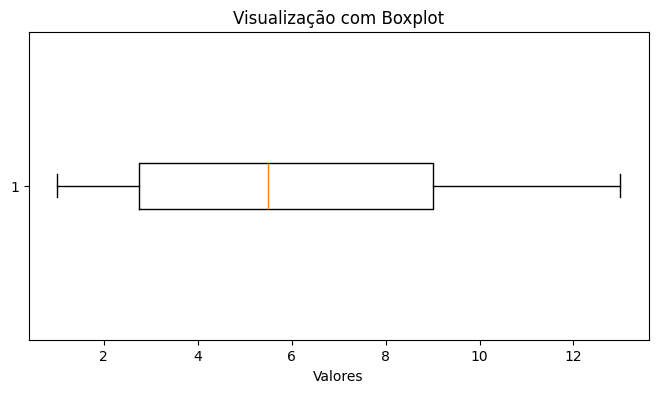

In [799]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 4))

# Definindo o título e os eixos
plt.title('Visualização com Boxplot')
plt.xlabel('Valores')

# Plotando o boxplot
plt.boxplot(k, vert=False)

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

Documentação das principais funções utilizadas:
- [`pd.DataFrame.quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
- [`pd.DataFrame.boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

In [800]:
# Carregando o dataset
df = pd.read_csv('iris.csv')

df.info()  # Verificando as informações do dataset
df.head()  # Visualizando as primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [801]:
# Calculando os quartis
df.quantile([0.25, 0.5, 0.75], numeric_only=True)
# `numeric_only=True` para calcular apenas as colunas numéricas, caso contrário, 
# ocorrerá um erro por conta da coluna `variety` (string)

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


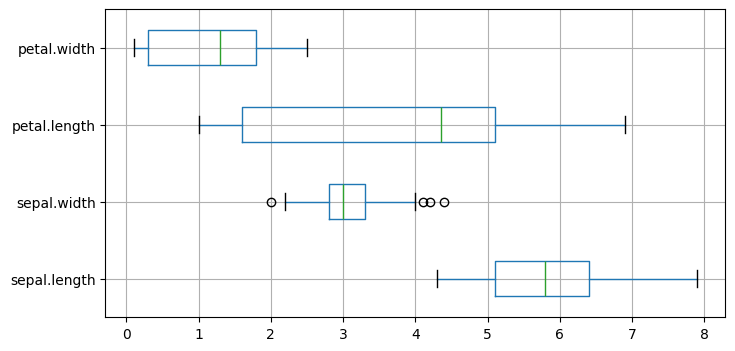

In [802]:
# Visualizando os quartis de todas as colunas usando boxplot
df.boxplot(figsize=(8, 4), vert=False)
plt.show()

# Decis

## A partir de um array

In [803]:
# Criando um array
k = np.array([1, 3, 5, 6, 6, 9, 10, 13, 15, 20, 22, 24, 25, 29, 31, 31, 39, 40, 55, 90, 91])

# Calculando os decis
quantile(k, np.arange(0.1, 1, 0.1))

,Quantis
10%,5.0
20%,6.0
30%,10.0
40%,15.0
50%,22.0
60%,25.0
70%,31.0
80%,39.0
90%,55.0


In [804]:
# Decis específicos
np.quantile(k, 0.3)

10.0

## A partir de uma fdt

In [805]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([4, 9, 11, 8, 5, 3]),
        start=50,
        end=74)
fdt

,f,rf,rf(%),cf,cf(%)
"[50.0, 54.0)",4,0.100,10.0,4,10.0
"[54.0, 58.0)",9,0.225,22.5,13,32.5
"[58.0, 62.0)",11,0.275,27.5,24,60.0
"[62.0, 66.0)",8,0.200,20.0,32,80.0
"[66.0, 70.0)",5,0.125,12.5,37,92.5
"[70.0, 74.0)",3,0.075,7.5,40,100.0


In [806]:
# Calculando os decis
quantile(fdt, np.arange(0.1, 1, 0.1))

,Quantis
10%,54.000000
20%,55.777778
30%,57.555556
40%,59.090909
50%,60.545455
60%,62.000000
70%,64.000000
80%,66.000000
90%,69.200000


## Visualização com Gráfico de Barras

Documentação das principais funções utilizadas:
- [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

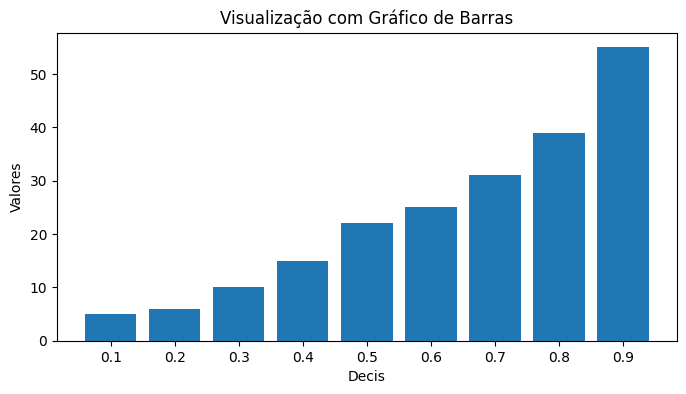

In [807]:
# Calculando os decis
d = np.quantile(k, np.arange(0.1, 1, 0.1))

# Definindo o tamanho da figura
plt.figure(figsize=(8, 4))

# Definindo o título e os eixos
plt.title('Visualização com Gráfico de Barras')
plt.xlabel('Decis')
plt.ylabel('Valores')

# Definindo os ticks do eixo x
plt.xticks(np.arange(0.1, 1, 0.1))

# Cada barra representa um decil
plt.bar(np.arange(0.1, 1, 0.1), d, width=0.08)

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

In [808]:
# O conjunto de dados utilizado será o `df` criado anteriormente

# Calculando os decis
df.quantile(np.arange(0.1, 1, 0.1), numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.1,4.80,2.50,1.40,0.20
0.2,5.00,2.70,1.50,0.20
0.3,5.27,2.80,1.70,0.40
0.4,5.60,3.00,3.90,1.16
0.5,5.80,3.00,4.35,1.30
0.6,6.10,3.10,4.64,1.50
0.7,6.30,3.20,5.00,1.80
0.8,6.52,3.40,5.32,1.90
0.9,6.90,3.61,5.80,2.20


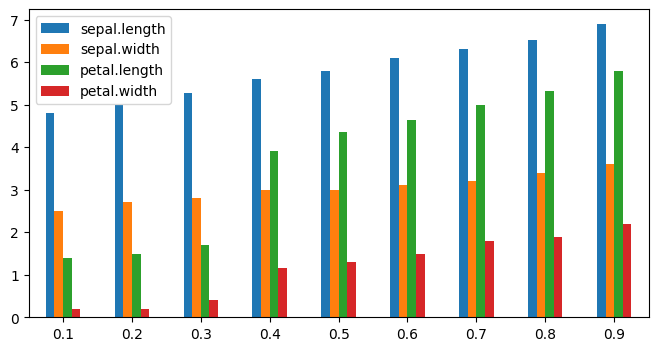

In [809]:
# Visualizando os decis de todas as colunas usando gráfico de barras
# NOTA: É necessário arredondar os valores para evitar erros de precisão de ponto flutuante

df.quantile(np.round(np.arange(0.1, 1, 0.1), 1), numeric_only=True)\
    .plot.bar(figsize=(8, 4))
plt.xticks(rotation=0)
plt.show()

# Percentis

## A partir de um array

In [810]:
# Criando um array
k = np.array([31, 31, 37, 40, 48, 50, 51, 51, 60, 62, 64, 65, 65, 65, 66, 74, 74, 88, 91, 92])

# Todos os percentis
quantile(k, np.arange(0.01, 1, 0.01))

,Quantis
1%,31.00
2%,31.00
3%,31.00
4%,31.00
5%,31.00
...,...
95%,91.05
96%,91.24
97%,91.43
98%,91.62


In [811]:
# Percentis específicos
np.quantile(k, 0.92)

89.44

## A partir de uma fdt

In [812]:
# Criando uma tabela de distribuição de frequência
fdt = FrequencyTable(
        f=np.array([5, 7, 4, 2, 2]),
        start=4,
        end=24)
fdt

,f,rf,rf(%),cf,cf(%)
"[4.0, 8.0)",5,0.25,25.0,5,25.0
"[8.0, 12.0)",7,0.35,35.0,12,60.0
"[12.0, 16.0)",4,0.20,20.0,16,80.0
"[16.0, 20.0)",2,0.10,10.0,18,90.0
"[20.0, 24.0)",2,0.10,10.0,20,100.0


In [813]:
# Calculando os percentis
quantile(fdt, np.arange(0.01, 1, 0.01))

,Quantis
1%,4.16
2%,4.32
3%,4.48
4%,4.64
5%,4.80
...,...
95%,22.00
96%,22.40
97%,22.80
98%,23.20


## Visualização com Gráfico de Linhas

Documentação das principais funções utilizadas:
- [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

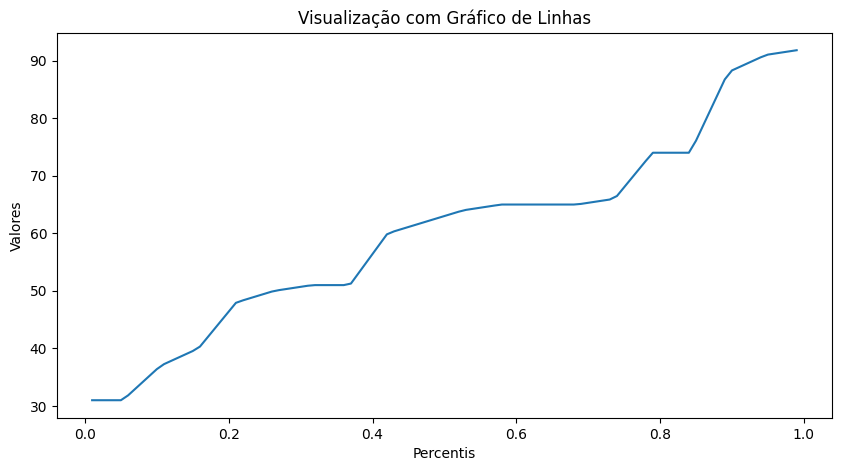

In [814]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 5))

# Definindo o título e os eixos
plt.title('Visualização com Gráfico de Linhas')
plt.xlabel('Percentis')
plt.ylabel('Valores')

# Cada ponto representa um percentil
plt.plot(np.arange(0.01, 1, 0.01), np.quantile(k, np.arange(0.01, 1, 0.01)))

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

In [815]:
# O conjunto de dados utilizado será o `df` criado anteriormente

# Calculando os percentis
df.quantile(np.arange(0.01, 1, 0.01), numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
0.01,4.400,2.200,1.149,0.100
0.02,4.400,2.200,1.200,0.100
0.03,4.547,2.300,1.300,0.147
0.04,4.600,2.300,1.300,0.200
0.05,4.600,2.345,1.300,0.200
...,...,...,...,...
0.95,7.255,3.800,6.100,2.300
0.96,7.408,3.804,6.108,2.304
0.97,7.653,3.900,6.353,2.400
0.98,7.700,4.002,6.602,2.402


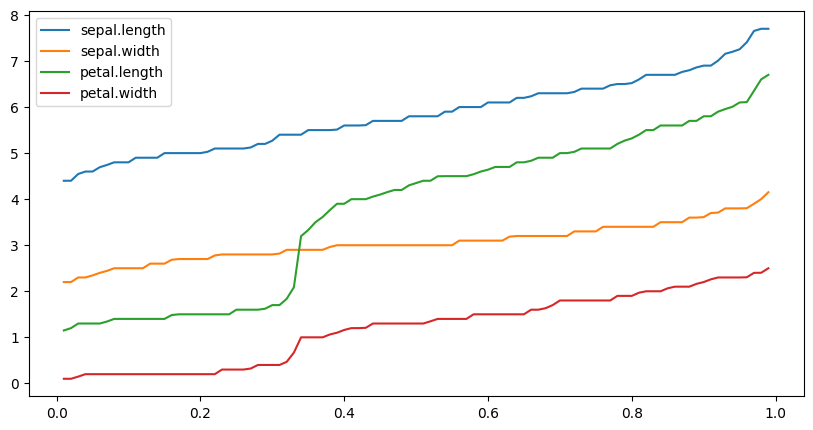

In [816]:
# Visualizando os percentis de todas as colunas usando gráfico de linhas
df.quantile(np.arange(0.01, 1, 0.01), numeric_only=True)\
    .plot(figsize=(10, 5))
plt.show()

# Fim!

Notebook criado por [Italo Seara](https://github.com/italoseara)